In [12]:
library(SingleCellExperiment)
library(Matrix)

In [13]:
published_meta = readRDS('/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/all_data/panC.freq.all.meta.tb.rds')


In [14]:
published_meta %>% colnames

[1] "patient"             "cellID"              "libraryID"          
 [4] "cancerType"          "loc"                 "batchV"             
 [7] "TCR"                 "dataset"             "ClusterID"          
[10] "dataset.tech"        "cellID.uniq"         "S.Score"            
[13] "G2M.Score"           "Phase"               "DIG.Score1"         
[16] "score.MALAT1"        "percent.mito"        "miniCluster"        
[19] "ClusterID.harmony"   "meta.cluster"        "meta.cluster.coarse"
[22] "cancerType.old"      "dataset.old"         "sampleID"           
[25] "treatment"           "stype"               "patient.uid"        
[28] "usedForFreq"         "dataSource"          "tech"               
[31] "tech.cate"           "pub"

In [15]:
published_meta %>% head %>% t

patient,BC9,BC9,BC9,BC9,BC9,BC9
cellID,s1_AAACCTGAGCAGACTG-1,s1_AAACCTGAGGTCGGAT-1,s1_AAACCTGAGTGTACTC-1,s1_AAACCTGCAGATGGGT-1,s1_AAACCTGGTAGCACGA-1,s1_AAACCTGGTAGCGTGA-1
libraryID,BC9T,BC9T,BC9T,BC9T,BC9T,BC9T
cancerType,BRCA,BRCA,BRCA,BRCA,BRCA,BRCA
loc,T,T,T,T,T,T
batchV,BC9,BC9,BC9,BC9,BC9,BC9
TCR,NA,NA,NA,NA,NA,NA
dataset,BRCA.ElhamAzizi2018.10X,BRCA.ElhamAzizi2018.10X,BRCA.ElhamAzizi2018.10X,BRCA.ElhamAzizi2018.10X,BRCA.ElhamAzizi2018.10X,BRCA.ElhamAzizi2018.10X
ClusterID,BC.Elham2018.10X.C01,BC.Elham2018.10X.C06,BC.Elham2018.10X.C01,BC.Elham2018.10X.C04,BC.Elham2018.10X.C00,BC.Elham2018.10X.C00
dataset.tech,Elham2018.10X,Elham2018.10X,Elham2018.10X,Elham2018.10X,Elham2018.10X,Elham2018.10X
cellID.uniq,BC.Elham2018.10X.s1_AAACCTGAGCAGACTG-1,BC.Elham2018.10X.s1_AAACCTGAGGTCGGAT-1,BC.Elham2018.10X.s1_AAACCTGAGTGTACTC-1,BC.Elham2018.10X.s1_AAACCTGCAGATGGGT-1,BC.Elham2018.10X.s1_AAACCTGGTAGCACGA-1,BC.Elham2018.10X.s1_AAACCTGGTAGCGTGA-1


The goal of this notebook is to load all the Pan-cancer datasets and merge into a single atlas.

In [16]:
cd4.dir = '/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/all_data/data/expression/CD4/byDataset/'
cd8.dir = '/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/all_data/data/expression/CD8/byDataset/'


In [17]:
cd4.list = list.files(cd4.dir)
cd8.list = list.files(cd8.dir)

cd4.list %>% length
cd8.list %>% length

[1] 35

[1] 35

In [68]:
cd8.list

[1] "AML.PeterVanGalen2019.sce.rds"      "BCC.KathrynEYost2019.sce.rds"      
 [3] "BCL.thisStudy.sce.rds"              "BRCA.ElhamAzizi2018_10X.sce.rds"   
 [5] "BRCA.ElhamAzizi2018_Indrop.sce.rds" "BRCA.PeterSavas2018.sce.rds"       
 [7] "BRCA.thisStudy.sce.rds"             "CHOL.thisStudy.sce.rds"            
 [9] "CRC.LeiZhang2018.sce.rds"           "CRC.LeiZhang2020_10X.sce.rds"      
[11] "ESCA.thisStudy.sce.rds"             "FTC.thisStudy.sce.rds"             
[13] "HCC.ChunhongZheng2017.sce.rds"      "HCC.QimingZhang2019_10X.sce.rds"   
[15] "HCC.QimingZhang2019_SS2.sce.rds"    "HNSCC.SidharthVPuram2017.sce.rds"  
[17] "LC.DietherLambrechts2018.sce.rds"   "LC.QianqianSong2019.sce.rds"       
[19] "LC.RapolasZilionis2019.sce.rds"     "LC.XinyiGuo2018.sce.rds"           
[21] "LIHC.LichunMa2019.sce.rds"          "MELA.HanjieLi2019.sce.rds"         
[23] "MELA.LivnatJerby-Arnon2018.sce.rds" "MELA.MosheSade-Feldman2018.sce.rds"
[25] "MM.thisStudy.sce.rds"               "NPC.YangLiu2021.sce.rds"           
[27] "OV.thisStudy.sce.rds"               "PACA.JunyaPeng2019.sce.rds"        
[29] "PACA.thisStudy.sce.rds"             "RC.MatthewDYoung2018.sce.rds"      
[31] "RC.thisStudy.sce.rds"               "SCC.KathrynEYost2019.sce.rds"      
[33] "STAD.BoxiKang2019.sce.rds"          "THCA.thisStudy.sce.rds"            
[35] "UCEC.thisStudy.sce.rds"

In [19]:
export_sce <- function(sce, filepath_prefix) {
    # Export expression matrix to Matrix Market format
    expr_matrix <- assay(sce, "counts") # Adjust as needed for the desired assay
    if(!inherits(expr_matrix, "sparseMatrix")) {
        expr_matrix <- Matrix(expr_matrix, sparse = TRUE)
    }
    writeMM(expr_matrix, paste0(filepath_prefix, "_expression.mtx"))
    
    # Export cell metadata to CSV
    cell_meta <- as.data.frame(colData(sce))
    write.csv(cell_meta, file=paste0(filepath_prefix, "_cell_metadata.csv"), quote=FALSE, row.names=TRUE)
    
    # Export gene metadata to CSV
    gene_meta <- as.data.frame(rowData(sce))
    write.csv(gene_meta, file=paste0(filepath_prefix, "_gene_metadata.csv"), quote=FALSE, row.names=TRUE)
}

In [23]:
outdir <- '../../../Data/PerDataset/Pancancer/IdvDatasets'

In [61]:
for (x in cd4.list){
    print(x)
    sce <- readRDS(paste0(cd4.dir, x))
    outpath <- paste(outdir, sub('_', ' ', sub('.sce.rds', '.CD4', x)), sep='/')
    if ("counts" %in% assayNames(sce)){
        export_sce(sce, outpath)
    } else {
        print(paste('Missing', x))
        print(assayNames(sce))
    }
}

[1] "AML.PeterVanGalen2019.sce.rds"
[1] "BCC.KathrynEYost2019.sce.rds"
[1] "BCL.thisStudy.sce.rds"
[1] "BRCA.ElhamAzizi2018_10X.sce.rds"
[1] "BRCA.ElhamAzizi2018_Indrop.sce.rds"
[1] "BRCA.PeterSavas2018.sce.rds"
[1] "BRCA.thisStudy.sce.rds"
[1] "CHOL.thisStudy.sce.rds"
[1] "CRC.LeiZhang2018.sce.rds"
[1] "CRC.LeiZhang2020_10X.sce.rds"
[1] "ESCA.thisStudy.sce.rds"
[1] "FTC.thisStudy.sce.rds"
[1] "HCC.ChunhongZheng2017.sce.rds"
[1] "HCC.QimingZhang2019_10X.sce.rds"
[1] "HCC.QimingZhang2019_SS2.sce.rds"
[1] "HNSCC.SidharthVPuram2017.sce.rds"
[1] "Missing HNSCC.SidharthVPuram2017.sce.rds"
[1] "log2TPM"    "norm_exprs"
[1] "LC.DietherLambrechts2018.sce.rds"
[1] "Missing LC.DietherLambrechts2018.sce.rds"
[1] "norm_exprs"
[1] "LC.QianqianSong2019.sce.rds"
[1] "LC.RapolasZilionis2019.sce.rds"
[1] "LC.XinyiGuo2018.sce.rds"
[1] "LIHC.LichunMa2019.sce.rds"
[1] "MELA.HanjieLi2019.sce.rds"
[1] "MELA.LivnatJerby-Arnon2018.sce.rds"
[1] "MELA.MosheSade-Feldman2018.sce.rds"
[1] "Missing MELA.MosheSade-F

In [65]:
for (x in cd8.list){
    print(x)
    sce <- readRDS(paste0(cd8.dir, x))
    outpath <- paste(outdir, sub('_', ' ', sub('.sce.rds', '.CD8', x)), sep='/')
    if ("counts" %in% assayNames(sce)){
        export_sce(sce, outpath)
    } else {
        print(paste('Missing', x))
        print(assayNames(sce))
    }
}

[1] "AML.PeterVanGalen2019.sce.rds"
[1] "BCC.KathrynEYost2019.sce.rds"
[1] "BCL.thisStudy.sce.rds"
[1] "BRCA.ElhamAzizi2018_10X.sce.rds"
[1] "BRCA.ElhamAzizi2018_Indrop.sce.rds"
[1] "BRCA.PeterSavas2018.sce.rds"
[1] "BRCA.thisStudy.sce.rds"
[1] "CHOL.thisStudy.sce.rds"
[1] "CRC.LeiZhang2018.sce.rds"
[1] "CRC.LeiZhang2020_10X.sce.rds"
[1] "ESCA.thisStudy.sce.rds"
[1] "FTC.thisStudy.sce.rds"
[1] "HCC.ChunhongZheng2017.sce.rds"
[1] "HCC.QimingZhang2019_10X.sce.rds"
[1] "HCC.QimingZhang2019_SS2.sce.rds"
[1] "HNSCC.SidharthVPuram2017.sce.rds"
[1] "Missing HNSCC.SidharthVPuram2017.sce.rds"
[1] "log2TPM"    "norm_exprs"
[1] "LC.DietherLambrechts2018.sce.rds"
[1] "Missing LC.DietherLambrechts2018.sce.rds"
[1] "norm_exprs"
[1] "LC.QianqianSong2019.sce.rds"
[1] "LC.RapolasZilionis2019.sce.rds"
[1] "LC.XinyiGuo2018.sce.rds"
[1] "LIHC.LichunMa2019.sce.rds"
[1] "MELA.HanjieLi2019.sce.rds"
[1] "MELA.LivnatJerby-Arnon2018.sce.rds"
[1] "MELA.MosheSade-Feldman2018.sce.rds"
[1] "Missing MELA.MosheSade-F

# Output metadata file

In [66]:
meta <- readRDS("/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/all_data/panC.freq.all.meta.tb.rds")

In [67]:
write.csv(meta, file='../../../Data/PerDataset/Pancancer/Complete_Published_Metadata.csv', quote=FALSE, row.names=TRUE)

# Get statistics on datasets

In [7]:
### For each dataset, load name, num genes, etc.
data_stats = data.frame(file = c(cd4.list, cd8.list), 
                        type = c(rep('CD4', length(cd4.list)), rep('CD8', length(cd8.list))),
                        ngenes = 0, ncell = 0)

rownames(data_stats) = str_replace(data_stats$file, 'sce.rds', (data_stats$type))

In [8]:
data_stats['assays'] = ''

In [9]:
data_stats

,file,type,ngenes,ncell,assays
,<chr>,<chr>,<dbl>,<dbl>,<chr>
AML.PeterVanGalen2019.CD4,AML.PeterVanGalen2019.sce.rds,CD4,0,0,
BCC.KathrynEYost2019.CD4,BCC.KathrynEYost2019.sce.rds,CD4,0,0,
BCL.thisStudy.CD4,BCL.thisStudy.sce.rds,CD4,0,0,
BRCA.ElhamAzizi2018_10X.CD4,BRCA.ElhamAzizi2018_10X.sce.rds,CD4,0,0,
BRCA.ElhamAzizi2018_Indrop.CD4,BRCA.ElhamAzizi2018_Indrop.sce.rds,CD4,0,0,
BRCA.PeterSavas2018.CD4,BRCA.PeterSavas2018.sce.rds,CD4,0,0,
BRCA.thisStudy.CD4,BRCA.thisStudy.sce.rds,CD4,0,0,
CHOL.thisStudy.CD4,CHOL.thisStudy.sce.rds,CD4,0,0,
CRC.LeiZhang2018.CD4,CRC.LeiZhang2018.sce.rds,CD4,0,0,


# Merge CD4s

## All datasets

In [12]:
### Initialize with first dataset
### Make sure dataset ngenes are > gene_thresh
sce <- readRDS(paste0(cd4.dir, cd4.list[1]))
dataset <- paste0('_', str_replace(cd4.list[1], '.sce.rds', ''), '.CD4')

meta <- colData(sce) %>% data.frame
rownames(meta) <- paste0(rownames(meta), dataset)

exprs <- assay(sce, 'counts')
colnames(exprs) <- paste0(colnames(exprs), dataset)

data_stats[substr(dataset, 2, nchar(dataset)), 'ngenes'] = exprs %>% nrow
data_stats[substr(dataset, 2, nchar(dataset)), 'ncell'] = exprs %>% ncol
data_stats[substr(dataset, 2, nchar(dataset)), 'assays'] = paste0(names(assays(sce)), collapse = '; ')

### Initialize
meta_all <- meta
exprs_all <- exprs

In [32]:
gene_thresh = 20000

for (x in cd4.list[2:length(cd4.list)]){
    print(x)
    
    ### Load each dataset
    sce <- readRDS(paste0(cd4.dir, x))
    dataset <- paste0('_', str_replace(x, '.sce.rds', ''), '.CD4')

    ### Merge datasets with raw counts
    if ('counts' %in% names(assays(sce))){
        
        meta <- colData(sce) %>% data.frame
        rownames(meta) <- paste0(rownames(meta), dataset)

        exprs <- assay(sce, 'counts')
        colnames(exprs) <- paste0(colnames(exprs), dataset)
        if ('seu.id' %in% colnames(rowData(sce))){rownames(exprs) <- rowData(sce)$seu.id}
        
        data_stats[substr(dataset, 2, nchar(dataset)), 'ngenes'] = exprs %>% nrow
        data_stats[substr(dataset, 2, nchar(dataset)), 'ncell'] = exprs %>% ncol
        data_stats[substr(dataset, 2, nchar(dataset)), 'assays'] = paste0(names(assays(sce)), collapse = '; ')
        
#         ### Only merge datasets if > x genes
#         if (nrow(exprs) > gene_thresh){
            
#             ### Merge by dataset
#             exprs_all <- merge(exprs_all, exprs, by = 'row.names')
#             rownames(exprs_all) <- exprs_all$Row.names
#             exprs_all <- exprs_all %>% dplyr::select(-Row.names)
#             print(exprs_all %>% dim)

#             meta_all <- bind_rows(meta_all, meta)
#             print(meta_all %>% dim)

#         }
    }
}

[1] "BCC.KathrynEYost2019.sce.rds"
[1] "BCL.thisStudy.sce.rds"
[1] "BRCA.ElhamAzizi2018_10X.sce.rds"
[1] "BRCA.ElhamAzizi2018_Indrop.sce.rds"
[1] "BRCA.PeterSavas2018.sce.rds"
[1] "BRCA.thisStudy.sce.rds"
[1] "CHOL.thisStudy.sce.rds"
[1] "CRC.LeiZhang2018.sce.rds"
[1] "CRC.LeiZhang2020_10X.sce.rds"
[1] "ESCA.thisStudy.sce.rds"
[1] "FTC.thisStudy.sce.rds"
[1] "HCC.ChunhongZheng2017.sce.rds"
[1] "HCC.QimingZhang2019_10X.sce.rds"
[1] "HCC.QimingZhang2019_SS2.sce.rds"
[1] "HNSCC.SidharthVPuram2017.sce.rds"
[1] "LC.DietherLambrechts2018.sce.rds"
[1] "LC.QianqianSong2019.sce.rds"
[1] "LC.RapolasZilionis2019.sce.rds"
[1] "LC.XinyiGuo2018.sce.rds"
[1] "LIHC.LichunMa2019.sce.rds"
[1] "MELA.HanjieLi2019.sce.rds"
[1] "MELA.LivnatJerby-Arnon2018.sce.rds"
[1] "MELA.MosheSade-Feldman2018.sce.rds"
[1] "MM.thisStudy.sce.rds"
[1] "NPC.YangLiu2021.sce.rds"
[1] "OV.thisStudy.sce.rds"
[1] "PACA.JunyaPeng2019.sce.rds"
[1] "PACA.thisStudy.sce.rds"
[1] "RC.MatthewDYoung2018.sce.rds"
[1] "RC.thisStudy.sce.rds

In [13]:
### Remove factors
meta_all[] <- lapply(meta_all, function(x){
    if(is.factor(x)){
        as.character(x)
    } else {x}
})

In [14]:
cd4.seu <- CreateSeuratObject(counts = exprs_all, meta.data = meta_all)

In [ ]:
cd4.seu

In [ ]:
meta_all %>% dim
meta_all %>% head(2)

In [ ]:
(exprs_all) %>% dim
colnames(exprs_all) %>% head

In [ ]:
table(colnames(exprs_all)==rownames(meta_all))

In [19]:
cd4_seuratpath = '/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/data/pancancer_zheng_all.CD4.h5seurat'

In [20]:
SaveH5Seurat(cd4.seu, cd4_seuratpath, overwrite = FALSE)

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA



In [21]:
Convert(cd4_seuratpath, dest = "h5ad", overwrite = FALSE)

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



### Export Seurat object

## Threshold on # of genes

In [12]:
### Initialize with first dataset
### Make sure dataset ngenes are > gene_thresh
sce <- readRDS(paste0(cd4.dir, cd4.list[1]))
dataset <- paste0('_', str_replace(cd4.list[1], '.sce.rds', ''), '.CD4')

meta <- colData(sce) %>% data.frame
rownames(meta) <- paste0(rownames(meta), dataset)

exprs <- assay(sce, 'counts')
colnames(exprs) <- paste0(colnames(exprs), dataset)

data_stats[substr(dataset, 2, nchar(dataset)), 'ngenes'] = exprs %>% nrow
data_stats[substr(dataset, 2, nchar(dataset)), 'ncell'] = exprs %>% ncol
data_stats[substr(dataset, 2, nchar(dataset)), 'assays'] = paste0(names(assays(sce)), collapse = '; ')

### Initialize
meta_all <- meta
exprs_all <- exprs

In [12]:
gene_thresh = 20000

for (x in cd4.list[2:length(cd4.list)]){
    print(x)
    
    ### Load each dataset
    sce <- readRDS(paste0(cd4.dir, x))
    dataset <- paste0('_', str_replace(x, '.sce.rds', ''), '.CD4')

    ### Merge datasets with raw counts
    if ('counts' %in% names(assays(sce))){
        
        meta <- colData(sce) %>% data.frame
        rownames(meta) <- paste0(rownames(meta), dataset)

        exprs <- assay(sce, 'counts')
        colnames(exprs) <- paste0(colnames(exprs), dataset)
        if ('seu.id' %in% colnames(rowData(sce))){rownames(exprs) <- rowData(sce)$seu.id}
        
        data_stats[substr(dataset, 2, nchar(dataset)), 'ngenes'] = exprs %>% nrow
        data_stats[substr(dataset, 2, nchar(dataset)), 'ncell'] = exprs %>% ncol
        data_stats[substr(dataset, 2, nchar(dataset)), 'assays'] = paste0(names(assays(sce)), collapse = '; ')
        
        ### Only merge datasets if > x genes
        if (nrow(exprs) > gene_thresh){
            
            ### Merge by dataset
            exprs_all <- merge(exprs_all, exprs, by = 'row.names')
            rownames(exprs_all) <- exprs_all$Row.names
            exprs_all <- exprs_all %>% dplyr::select(-Row.names)
            print(exprs_all %>% dim)

            meta_all <- bind_rows(meta_all, meta)
            print(meta_all %>% dim)

        }
    }
}

[1] "BCC.KathrynEYost2019.sce.rds"
[1] 17950 11568
[1] 11568    21
[1] "BCL.thisStudy.sce.rds"
[1] 17890 15805
[1] 15805    21
[1] "BRCA.ElhamAzizi2018_10X.sce.rds"
[1] "BRCA.ElhamAzizi2018_Indrop.sce.rds"
[1] "BRCA.PeterSavas2018.sce.rds"
[1] "BRCA.thisStudy.sce.rds"
[1] 17153 18868
[1] 18868    21
[1] "CHOL.thisStudy.sce.rds"
[1] "CRC.LeiZhang2018.sce.rds"
[1] "CRC.LeiZhang2020_10X.sce.rds"
[1] "ESCA.thisStudy.sce.rds"
[1] 17153 31226
[1] 31226    21
[1] "FTC.thisStudy.sce.rds"
[1] 17153 31496
[1] 31496    21
[1] "HCC.ChunhongZheng2017.sce.rds"
[1] "HCC.QimingZhang2019_10X.sce.rds"
[1] 17109 36239
[1] 36239    21
[1] "HCC.QimingZhang2019_SS2.sce.rds"
[1] 16819 36939
[1] 36939    21
[1] "HNSCC.SidharthVPuram2017.sce.rds"
[1] "LC.DietherLambrechts2018.sce.rds"
[1] "LC.QianqianSong2019.sce.rds"
[1] 16819 37295
[1] 37295    21
[1] "LC.RapolasZilionis2019.sce.rds"
[1] 16686 38830
[1] 38830    21
[1] "LC.XinyiGuo2018.sce.rds"
[1] "LIHC.LichunMa2019.sce.rds"
[1] "MELA.HanjieLi2019.sce.rds"


In [13]:
### Remove factors
meta_all[] <- lapply(meta_all, function(x){
    if(is.factor(x)){
        as.character(x)
    } else {x}
})

### Export Seurat object

In [14]:
cd4.seu <- CreateSeuratObject(counts = exprs_all, meta.data = meta_all)

In [15]:
cd4.seu

An object of class Seurat 
15829 features across 99051 samples within 1 assay 
Active assay: RNA (15829 features, 0 variable features)

In [16]:
meta_all %>% dim
meta_all %>% head(2)

[1] 99051    21

,patient,cellID,libraryID,cancerType,loc,batchV,TCR,dataset,ClusterID,dataset.tech,⋯,S.Score,G2M.Score,Phase,DIG.Score1,score.MALAT1,percent.mito,miniCluster,meta.cluster,meta.cluster.coarse,ClusterID.harmony
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
AML210A-D0_AATAAATGTTTC_AML.PeterVanGalen2019.CD4,AML210A,AML210A-D0_AATAAATGTTTC,NA,AML,T,AML210A-D0,NA,AML.PeterVanGalen2019,AML.PeterVanGalen2019.C00,PeterVanGalen2019,⋯,-0.09864335,-0.006611155,G1,0.1157308,5.257927,0.01433121,AML.PeterVanGalen2019.C0060,CD4.c01.Tn.TCF7,CD4.c01.Tn.LEF1,C23
AML210A-D0_ACCCGTATACAC_AML.PeterVanGalen2019.CD4,AML210A,AML210A-D0_ACCCGTATACAC,NA,AML,T,AML210A-D0,NA,AML.PeterVanGalen2019,AML.PeterVanGalen2019.C01,PeterVanGalen2019,⋯,-0.05874260,-0.039282822,G1,-0.1418381,4.220303,0.01162271,AML.PeterVanGalen2019.C0002,CD4.c20.Treg.TNFRSF9,CD4.c08.Treg.FOXP3,C04


In [17]:
(exprs_all) %>% dim
colnames(exprs_all) %>% head

[1] 15829 99051

[1] "AML210A-D0_AATAAATGTTTC_AML.PeterVanGalen2019.CD4"
[2] "AML210A-D0_ACCCGTATACAC_AML.PeterVanGalen2019.CD4"
[3] "AML210A-D0_ATCCCGTCGAAT_AML.PeterVanGalen2019.CD4"
[4] "AML210A-D0_CAATTACCGTCN_AML.PeterVanGalen2019.CD4"
[5] "AML210A-D0_CAGCGCACCATT_AML.PeterVanGalen2019.CD4"
[6] "AML210A-D0_CCCAAGGAGTCA_AML.PeterVanGalen2019.CD4"

In [18]:
table(colnames(exprs_all)==rownames(meta_all))


 TRUE 
99051 

In [19]:
cd4_seuratpath = '/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/data/pancancer_zheng_20kgenes.CD4.h5seurat'


In [20]:
SaveH5Seurat(cd4.seu, cd4_seuratpath, overwrite = FALSE)

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA



In [21]:
Convert(cd4_seuratpath, dest = "h5ad", overwrite = FALSE)

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



In [ ]:
# cd4.seu = LoadH5Seurat(cd4_seuratpath)

In [13]:
data_stats %>% head(35)

,file,type,ngenes,ncell
,<chr>,<chr>,<dbl>,<dbl>
AML.PeterVanGalen2019.CD4,AML.PeterVanGalen2019.sce.rds,CD4,27899,879
BCC.KathrynEYost2019.CD4,BCC.KathrynEYost2019.sce.rds,CD4,23309,10689
BCL.thisStudy.CD4,BCL.thisStudy.sce.rds,CD4,28855,4237
BRCA.ElhamAzizi2018_10X.CD4,BRCA.ElhamAzizi2018_10X.sce.rds,CD4,12908,11443
BRCA.ElhamAzizi2018_Indrop.CD4,BRCA.ElhamAzizi2018_Indrop.sce.rds,CD4,14854,3420
BRCA.PeterSavas2018.CD4,BRCA.PeterSavas2018.sce.rds,CD4,15623,1728
BRCA.thisStudy.CD4,BRCA.thisStudy.sce.rds,CD4,24148,3063
CHOL.thisStudy.CD4,CHOL.thisStudy.sce.rds,CD4,12582,242
CRC.LeiZhang2018.CD4,CRC.LeiZhang2018.sce.rds,CD4,12582,4870


In [14]:
data_stats %>% tail(35)

,file,type,ngenes,ncell
,<chr>,<chr>,<dbl>,<dbl>
AML.PeterVanGalen2019.CD8,AML.PeterVanGalen2019.sce.rds,CD8,0,0
BCC.KathrynEYost2019.CD8,BCC.KathrynEYost2019.sce.rds,CD8,0,0
BCL.thisStudy.CD8,BCL.thisStudy.sce.rds,CD8,0,0
BRCA.ElhamAzizi2018_10X.CD8,BRCA.ElhamAzizi2018_10X.sce.rds,CD8,0,0
BRCA.ElhamAzizi2018_Indrop.CD8,BRCA.ElhamAzizi2018_Indrop.sce.rds,CD8,0,0
BRCA.PeterSavas2018.CD8,BRCA.PeterSavas2018.sce.rds,CD8,0,0
BRCA.thisStudy.CD8,BRCA.thisStudy.sce.rds,CD8,0,0
CHOL.thisStudy.CD8,CHOL.thisStudy.sce.rds,CD8,0,0
CRC.LeiZhang2018.CD8,CRC.LeiZhang2018.sce.rds,CD8,0,0


# Merge CD8s

## All datasets

In [6]:
cd8.list %>% length

[1] 35

In [34]:
### Initialize with first dataset
sce <- readRDS(paste0(cd8.dir, cd8.list[1]))
dataset <- paste0('_', str_replace(cd8.list[1], '.sce.rds', ''), '.CD8')

meta <- colData(sce) %>% data.frame
rownames(meta) <- paste0(rownames(meta), dataset)

exprs <- assay(sce, 'counts')
colnames(exprs) <- paste0(colnames(exprs), dataset)

data_stats[substr(dataset, 2, nchar(dataset)), 'ngenes'] = exprs %>% nrow
data_stats[substr(dataset, 2, nchar(dataset)), 'ncell'] = exprs %>% ncol
data_stats[substr(dataset, 2, nchar(dataset)), 'assays'] = paste0(names(assays(sce)), collapse = '; ')

### Initialize
meta_all <- meta
exprs_all <- exprs

In [33]:
data_stats

,file,type,ngenes,ncell,assays
,<chr>,<chr>,<dbl>,<dbl>,<chr>
AML.PeterVanGalen2019.CD4,AML.PeterVanGalen2019.sce.rds,CD4,27899,879,norm_exprs; counts
BCC.KathrynEYost2019.CD4,BCC.KathrynEYost2019.sce.rds,CD4,23309,10689,counts; norm_exprs
BCL.thisStudy.CD4,BCL.thisStudy.sce.rds,CD4,28855,4237,counts; norm_exprs
BRCA.ElhamAzizi2018_10X.CD4,BRCA.ElhamAzizi2018_10X.sce.rds,CD4,12908,11443,counts; norm_exprs
BRCA.ElhamAzizi2018_Indrop.CD4,BRCA.ElhamAzizi2018_Indrop.sce.rds,CD4,14854,3420,counts; norm_exprs
BRCA.PeterSavas2018.CD4,BRCA.PeterSavas2018.sce.rds,CD4,15623,1728,counts; norm_exprs
BRCA.thisStudy.CD4,BRCA.thisStudy.sce.rds,CD4,24148,3063,counts; norm_exprs
CHOL.thisStudy.CD4,CHOL.thisStudy.sce.rds,CD4,12582,242,counts; norm_exprs
CRC.LeiZhang2018.CD4,CRC.LeiZhang2018.sce.rds,CD4,12582,4870,counts; norm_exprs


In [35]:
gene_thresh = 20000
for (x in cd8.list[2:length(cd8.list)]){
    print(x)
    
    ### Load each dataset
    sce <- readRDS(paste0(cd8.dir, x))
    dataset <- paste0('_', str_replace(x, '.sce.rds', ''), '.CD8')

    ### Merge datasets with raw counts
    if ('counts' %in% names(assays(sce))){
        
        meta <- colData(sce) %>% data.frame
        rownames(meta) <- paste0(rownames(meta), dataset)

        exprs <- assay(sce, 'counts')
        colnames(exprs) <- paste0(colnames(exprs), dataset)
        if ('seu.id' %in% colnames(rowData(sce))){rownames(exprs) <- rowData(sce)$seu.id}
        
        data_stats[substr(dataset, 2, nchar(dataset)), 'ngenes'] = exprs %>% nrow
        data_stats[substr(dataset, 2, nchar(dataset)), 'ncell'] = exprs %>% ncol
        data_stats[substr(dataset, 2, nchar(dataset)), 'assays'] = paste0(names(assays(sce)), collapse = '; ')
        
#         ### Only merge datasets if > x genes
#         if (nrow(exprs) > gene_thresh){
            
#             ### Merge by dataset
#             exprs_all <- merge(exprs_all, exprs, by = 'row.names')
#             rownames(exprs_all) <- exprs_all$Row.names
#             exprs_all <- exprs_all %>% dplyr::select(-Row.names)
#             print(exprs_all %>% dim)

#             meta_all <- bind_rows(meta_all, meta)
#             print(meta_all %>% dim)
#     }
}
}

[1] "BCC.KathrynEYost2019.sce.rds"
[1] "BCL.thisStudy.sce.rds"
[1] "BRCA.ElhamAzizi2018_10X.sce.rds"
[1] "BRCA.ElhamAzizi2018_Indrop.sce.rds"
[1] "BRCA.PeterSavas2018.sce.rds"
[1] "BRCA.thisStudy.sce.rds"
[1] "CHOL.thisStudy.sce.rds"
[1] "CRC.LeiZhang2018.sce.rds"
[1] "CRC.LeiZhang2020_10X.sce.rds"
[1] "ESCA.thisStudy.sce.rds"
[1] "FTC.thisStudy.sce.rds"
[1] "HCC.ChunhongZheng2017.sce.rds"
[1] "HCC.QimingZhang2019_10X.sce.rds"
[1] "HCC.QimingZhang2019_SS2.sce.rds"
[1] "HNSCC.SidharthVPuram2017.sce.rds"
[1] "LC.DietherLambrechts2018.sce.rds"
[1] "LC.QianqianSong2019.sce.rds"
[1] "LC.RapolasZilionis2019.sce.rds"
[1] "LC.XinyiGuo2018.sce.rds"
[1] "LIHC.LichunMa2019.sce.rds"
[1] "MELA.HanjieLi2019.sce.rds"
[1] "MELA.LivnatJerby-Arnon2018.sce.rds"
[1] "MELA.MosheSade-Feldman2018.sce.rds"
[1] "MM.thisStudy.sce.rds"
[1] "NPC.YangLiu2021.sce.rds"
[1] "OV.thisStudy.sce.rds"
[1] "PACA.JunyaPeng2019.sce.rds"
[1] "PACA.thisStudy.sce.rds"
[1] "RC.MatthewDYoung2018.sce.rds"
[1] "RC.thisStudy.sce.rds

In [12]:
### Remove factors
meta_all[] <- lapply(meta_all, function(x){
    if(is.factor(x)){
        as.character(x)
    } else {x}
})


### Export Seurat object

In [14]:
cd8.seu <- CreateSeuratObject(counts = exprs_all, meta.data = meta_all)

In [ ]:
meta_all %>% dim
meta_all %>% head(2)

In [ ]:
(exprs_all) %>% dim
colnames(exprs_all) %>% head

In [ ]:
table(colnames(exprs_all)==rownames(meta_all))

In [18]:
cd8_seuratpath = '/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/data/pancancer_zheng_all.CD8.h5seurat'


In [19]:
SaveH5Seurat(cd8.seu, cd8_seuratpath, overwrite = FALSE)

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA



In [20]:
Convert(cd8_seuratpath, dest = "h5ad", overwrite = FALSE)

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



## Threshold on # of genes

In [34]:
### Initialize with first dataset
sce <- readRDS(paste0(cd8.dir, cd8.list[1]))
dataset <- paste0('_', str_replace(cd8.list[1], '.sce.rds', ''), '.CD8')

meta <- colData(sce) %>% data.frame
rownames(meta) <- paste0(rownames(meta), dataset)

exprs <- assay(sce, 'counts')
colnames(exprs) <- paste0(colnames(exprs), dataset)

data_stats[substr(dataset, 2, nchar(dataset)), 'ngenes'] = exprs %>% nrow
data_stats[substr(dataset, 2, nchar(dataset)), 'ncell'] = exprs %>% ncol
data_stats[substr(dataset, 2, nchar(dataset)), 'assays'] = paste0(names(assays(sce)), collapse = '; ')

### Initialize
meta_all <- meta
exprs_all <- exprs

In [33]:
data_stats

,file,type,ngenes,ncell,assays
,<chr>,<chr>,<dbl>,<dbl>,<chr>
AML.PeterVanGalen2019.CD4,AML.PeterVanGalen2019.sce.rds,CD4,27899,879,norm_exprs; counts
BCC.KathrynEYost2019.CD4,BCC.KathrynEYost2019.sce.rds,CD4,23309,10689,counts; norm_exprs
BCL.thisStudy.CD4,BCL.thisStudy.sce.rds,CD4,28855,4237,counts; norm_exprs
BRCA.ElhamAzizi2018_10X.CD4,BRCA.ElhamAzizi2018_10X.sce.rds,CD4,12908,11443,counts; norm_exprs
BRCA.ElhamAzizi2018_Indrop.CD4,BRCA.ElhamAzizi2018_Indrop.sce.rds,CD4,14854,3420,counts; norm_exprs
BRCA.PeterSavas2018.CD4,BRCA.PeterSavas2018.sce.rds,CD4,15623,1728,counts; norm_exprs
BRCA.thisStudy.CD4,BRCA.thisStudy.sce.rds,CD4,24148,3063,counts; norm_exprs
CHOL.thisStudy.CD4,CHOL.thisStudy.sce.rds,CD4,12582,242,counts; norm_exprs
CRC.LeiZhang2018.CD4,CRC.LeiZhang2018.sce.rds,CD4,12582,4870,counts; norm_exprs


In [10]:
gene_thresh = 20000
for (x in cd8.list[2:length(cd8.list)]){
    print(x)
    
    ### Load each dataset
    sce <- readRDS(paste0(cd8.dir, x))
    dataset <- paste0('_', str_replace(x, '.sce.rds', ''), '.CD8')

    ### Merge datasets with raw counts
    if ('counts' %in% names(assays(sce))){
        
        meta <- colData(sce) %>% data.frame
        rownames(meta) <- paste0(rownames(meta), dataset)

        exprs <- assay(sce, 'counts')
        colnames(exprs) <- paste0(colnames(exprs), dataset)
        if ('seu.id' %in% colnames(rowData(sce))){rownames(exprs) <- rowData(sce)$seu.id}
        
        data_stats[substr(dataset, 2, nchar(dataset)), 'ngenes'] = exprs %>% nrow
        data_stats[substr(dataset, 2, nchar(dataset)), 'ncell'] = exprs %>% ncol
        data_stats[substr(dataset, 2, nchar(dataset)), 'assays'] = paste0(names(assays(sce)), collapse = '; ')
        
        ### Only merge datasets if > x genes
        if (nrow(exprs) > gene_thresh){
            
            ### Merge by dataset
            exprs_all <- merge(exprs_all, exprs, by = 'row.names')
            rownames(exprs_all) <- exprs_all$Row.names
            exprs_all <- exprs_all %>% dplyr::select(-Row.names)
            print(exprs_all %>% dim)

            meta_all <- bind_rows(meta_all, meta)
            print(meta_all %>% dim)
    }
}
}

[1] "BCC.KathrynEYost2019.sce.rds"
[1] 17950 11232
[1] 11232    21
[1] "BCL.thisStudy.sce.rds"
[1] 17890 14714
[1] 14714    21
[1] "BRCA.ElhamAzizi2018_10X.sce.rds"
[1] "BRCA.ElhamAzizi2018_Indrop.sce.rds"
[1] "BRCA.PeterSavas2018.sce.rds"
[1] "BRCA.thisStudy.sce.rds"
[1] 17153 19005
[1] 19005    21
[1] "CHOL.thisStudy.sce.rds"
[1] "CRC.LeiZhang2018.sce.rds"
[1] "CRC.LeiZhang2020_10X.sce.rds"
[1] "ESCA.thisStudy.sce.rds"
[1] 17153 31531
[1] 31531    21
[1] "FTC.thisStudy.sce.rds"
[1] 17153 32298
[1] 32298    21
[1] "HCC.ChunhongZheng2017.sce.rds"
[1] "HCC.QimingZhang2019_10X.sce.rds"
[1] 17109 43601
[1] 43601    21
[1] "HCC.QimingZhang2019_SS2.sce.rds"
[1] 16819 44352
[1] 44352    21
[1] "HNSCC.SidharthVPuram2017.sce.rds"
[1] "LC.DietherLambrechts2018.sce.rds"
[1] "LC.QianqianSong2019.sce.rds"
[1] 16819 45201
[1] 45201    21
[1] "LC.RapolasZilionis2019.sce.rds"
[1] 16686 46404
[1] 46404    21
[1] "LC.XinyiGuo2018.sce.rds"
[1] "LIHC.LichunMa2019.sce.rds"
[1] "MELA.HanjieLi2019.sce.rds"


In [11]:
meta_all %>% dim
exprs_all %>% dim

[1] 146500     21

[1]  15829 146500

In [17]:
# ### Temporary save (due to memory issues)
# saveRDS(exprs_all, 
#         '/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/data/pancancer_zheng_all.CD8.exprsall.rds')

# saveRDS(meta_all, 
#         '/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/data/pancancer_zheng_all.CD8.metaall.rds')

# ### Temporary read
# exprs_all <- readRDS('/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/data/pancancer_zheng_all.CD8.exprsall.rds')
# meta_all <- readRDS('/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/data/pancancer_zheng_all.CD8.metaall.rds')

In [12]:
### Remove factors
meta_all[] <- lapply(meta_all, function(x){
    if(is.factor(x)){
        as.character(x)
    } else {x}
})


In [13]:
meta_all %>% head(2)

,patient,cellID,libraryID,cancerType,loc,batchV,TCR,dataset,ClusterID,dataset.tech,⋯,S.Score,G2M.Score,Phase,DIG.Score1,score.MALAT1,percent.mito,miniCluster,ClusterID.harmony,meta.cluster,meta.cluster.coarse
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
AML210A-D0_ACCAAAGACACN_AML.PeterVanGalen2019.CD8,AML210A,AML210A-D0_ACCAAAGACACN,NA,AML,T,AML210A-D0,NA,AML.PeterVanGalen2019,AML.PeterVanGalen2019.C06,PeterVanGalen2019,⋯,-0.01720538,0.06745588,G2M,0.22097626,5.230159,0.01238816,AML.PeterVanGalen2019.C0067,C06,CD8.c02.Tm.IL7R,CD8.c02.Tm.IL7R
AML210A-D0_ATCTTGCTTTCN_AML.PeterVanGalen2019.CD8,AML210A,AML210A-D0_ATCTTGCTTTCN,NA,AML,T,AML210A-D0,NA,AML.PeterVanGalen2019,AML.PeterVanGalen2019.C00,PeterVanGalen2019,⋯,0.08789321,-0.02286226,S,-0.02174834,5.105955,0.01230012,AML.PeterVanGalen2019.C0034,C23,CD8.c06.Tem.GZMK,CD8.c05.Tem.GZMK


### Export Seurat object

In [14]:
cd8.seu <- CreateSeuratObject(counts = exprs_all, meta.data = meta_all)

In [15]:
meta_all %>% dim
meta_all %>% head(2)

[1] 146500     21

,patient,cellID,libraryID,cancerType,loc,batchV,TCR,dataset,ClusterID,dataset.tech,⋯,S.Score,G2M.Score,Phase,DIG.Score1,score.MALAT1,percent.mito,miniCluster,ClusterID.harmony,meta.cluster,meta.cluster.coarse
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
AML210A-D0_ACCAAAGACACN_AML.PeterVanGalen2019.CD8,AML210A,AML210A-D0_ACCAAAGACACN,NA,AML,T,AML210A-D0,NA,AML.PeterVanGalen2019,AML.PeterVanGalen2019.C06,PeterVanGalen2019,⋯,-0.01720538,0.06745588,G2M,0.22097626,5.230159,0.01238816,AML.PeterVanGalen2019.C0067,C06,CD8.c02.Tm.IL7R,CD8.c02.Tm.IL7R
AML210A-D0_ATCTTGCTTTCN_AML.PeterVanGalen2019.CD8,AML210A,AML210A-D0_ATCTTGCTTTCN,NA,AML,T,AML210A-D0,NA,AML.PeterVanGalen2019,AML.PeterVanGalen2019.C00,PeterVanGalen2019,⋯,0.08789321,-0.02286226,S,-0.02174834,5.105955,0.01230012,AML.PeterVanGalen2019.C0034,C23,CD8.c06.Tem.GZMK,CD8.c05.Tem.GZMK


In [16]:
(exprs_all) %>% dim
colnames(exprs_all) %>% head

[1]  15829 146500

[1] "AML210A-D0_ACCAAAGACACN_AML.PeterVanGalen2019.CD8"
[2] "AML210A-D0_ATCTTGCTTTCN_AML.PeterVanGalen2019.CD8"
[3] "AML210A-D0_ATTCATCACTAN_AML.PeterVanGalen2019.CD8"
[4] "AML210A-D0_CCGTGGTGCTGA_AML.PeterVanGalen2019.CD8"
[5] "AML210A-D0_TGTTTCATCTTN_AML.PeterVanGalen2019.CD8"
[6] "AML210A-D0_CTACCTGGTTTA_AML.PeterVanGalen2019.CD8"

In [17]:
table(colnames(exprs_all)==rownames(meta_all))


  TRUE 
146500 

In [18]:
cd8_seuratpath = '/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/data/pancancer_zheng_20kgenes.CD8.h5seurat'


In [19]:
SaveH5Seurat(cd8.seu, cd8_seuratpath, overwrite = FALSE)

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA



In [20]:
Convert(cd8_seuratpath, dest = "h5ad", overwrite = FALSE)

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



# View data stats from all datasets

In [97]:
summary((data_stats %>% filter(ncell != 0))$ngenes)
table((data_stats %>% filter(ncell != 0))$ngenes) %>% sort %>% rev

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12487   15830   24148   25434   28616   60682 


24148 12582 33694 28855 60682 58233 55765 41861 27899 24005 23309 19048 18372 
   16     8     4     4     2     2     2     2     2     2     2     2     2 
18347 16452 15623 14854 12908 12487 
    2     2     2     2     2     2 

In [93]:
table((data_stats %>% filter(ncell != 0))$ngenes < 15000)
table((data_stats %>% filter(ncell != 0))$ngenes < 20000)
table((data_stats %>% filter(ncell != 0))$ngenes < 25000)
table((data_stats %>% filter(ncell != 0))$ngenes < 30000)
table((data_stats %>% filter(ncell != 0))$ngenes < 50000)


FALSE  TRUE 
   48    14 


FALSE  TRUE 
   38    24 


FALSE  TRUE 
   18    44 


FALSE  TRUE 
   12    50 


FALSE  TRUE 
    6    56 

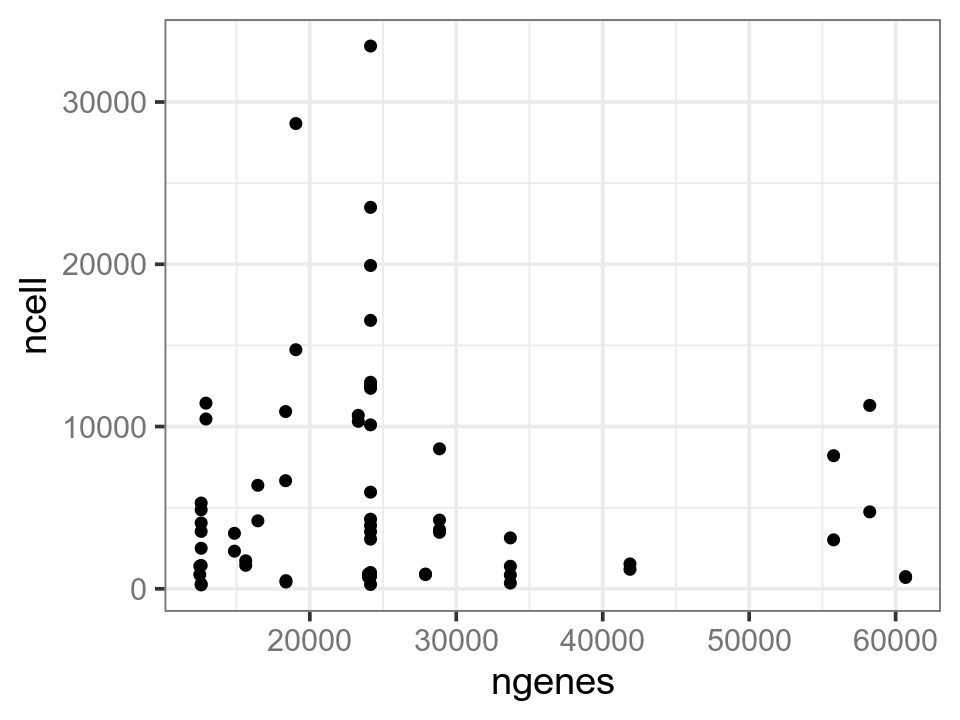

In [102]:
fig.size(6, 8)
ggplot(data_stats %>% filter(ncell != 0))+
    geom_point(aes(x = ngenes, y = ncell), size = 3)+
    theme_pres()

In [110]:
x = 20000
(data_stats %>% filter(ncell != 0) %>% filter(ngenes > 0))$ncell %>% sum
(data_stats %>% filter(ncell != 0) %>% filter(ngenes > x))$ncell %>% sum

x = 15000
(data_stats %>% filter(ncell != 0) %>% filter(ngenes > 0))$ncell %>% sum
(data_stats %>% filter(ncell != 0) %>% filter(ngenes > x))$ncell %>% sum

[1] 373380

[1] 245551

[1] 373380

[1] 321221

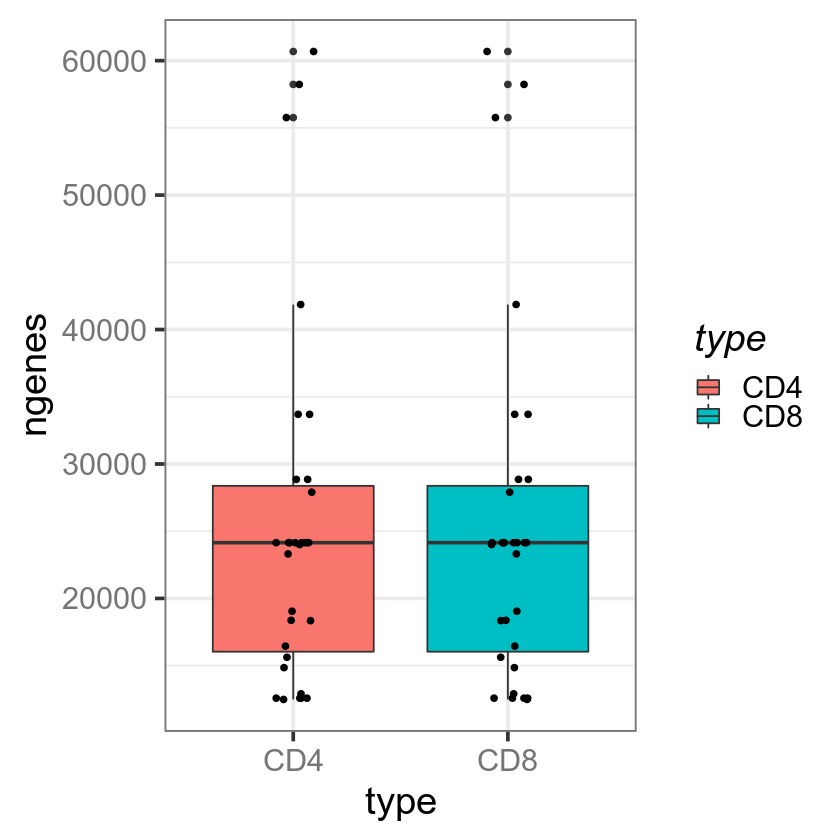

In [83]:
ggplot(data_stats %>% filter(ncell != 0))+
    geom_boxplot(aes(x = type, y = ngenes, fill = type))+
    geom_jitter(aes(x = type, y = ngenes),  height = 0, width = .1)+
    theme_pres()

In [66]:
data_stats

,file,type,ngenes,ncell
,<chr>,<chr>,<dbl>,<dbl>
AML.PeterVanGalen2019.CD4,AML.PeterVanGalen2019.sce.rds,CD4,27899,879
BCC.KathrynEYost2019.CD4,BCC.KathrynEYost2019.sce.rds,CD4,23309,10689
BCL.thisStudy.CD4,BCL.thisStudy.sce.rds,CD4,28855,4237
BRCA.ElhamAzizi2018_10X.CD4,BRCA.ElhamAzizi2018_10X.sce.rds,CD4,12908,11443
BRCA.ElhamAzizi2018_Indrop.CD4,BRCA.ElhamAzizi2018_Indrop.sce.rds,CD4,14854,3420
BRCA.PeterSavas2018.CD4,BRCA.PeterSavas2018.sce.rds,CD4,15623,1728
BRCA.thisStudy.CD4,BRCA.thisStudy.sce.rds,CD4,24148,3063
CHOL.thisStudy.CD4,CHOL.thisStudy.sce.rds,CD4,12582,242
CRC.LeiZhang2018.CD4,CRC.LeiZhang2018.sce.rds,CD4,12582,4870


In [17]:
data_stats %>% head(35)

,file,type,ngenes,ncell
,<chr>,<chr>,<dbl>,<dbl>
AML.PeterVanGalen2019.CD4,AML.PeterVanGalen2019.sce.rds,CD4,27899,879
BCC.KathrynEYost2019.CD4,BCC.KathrynEYost2019.sce.rds,CD4,23309,10689
BCL.thisStudy.CD4,BCL.thisStudy.sce.rds,CD4,28855,4237
BRCA.ElhamAzizi2018_10X.CD4,BRCA.ElhamAzizi2018_10X.sce.rds,CD4,12908,11443
BRCA.ElhamAzizi2018_Indrop.CD4,BRCA.ElhamAzizi2018_Indrop.sce.rds,CD4,14854,3420
BRCA.PeterSavas2018.CD4,BRCA.PeterSavas2018.sce.rds,CD4,15623,1728
BRCA.thisStudy.CD4,BRCA.thisStudy.sce.rds,CD4,24148,3063
CHOL.thisStudy.CD4,CHOL.thisStudy.sce.rds,CD4,12582,242
CRC.LeiZhang2018.CD4,CRC.LeiZhang2018.sce.rds,CD4,12582,4870


In [18]:
data_stats %>% tail(35)

,file,type,ngenes,ncell
,<chr>,<chr>,<dbl>,<dbl>
AML.PeterVanGalen2019.CD8,AML.PeterVanGalen2019.sce.rds,CD8,27899,910
BCC.KathrynEYost2019.CD8,BCC.KathrynEYost2019.sce.rds,CD8,23309,10322
BCL.thisStudy.CD8,BCL.thisStudy.sce.rds,CD8,28855,3482
BRCA.ElhamAzizi2018_10X.CD8,BRCA.ElhamAzizi2018_10X.sce.rds,CD8,12908,10466
BRCA.ElhamAzizi2018_Indrop.CD8,BRCA.ElhamAzizi2018_Indrop.sce.rds,CD8,14854,2321
BRCA.PeterSavas2018.CD8,BRCA.PeterSavas2018.sce.rds,CD8,15623,1450
BRCA.thisStudy.CD8,BRCA.thisStudy.sce.rds,CD8,24148,4291
CHOL.thisStudy.CD8,CHOL.thisStudy.sce.rds,CD8,12582,300
CRC.LeiZhang2018.CD8,CRC.LeiZhang2018.sce.rds,CD8,12582,3538


In [22]:
data_stats %>% head(2)

,file,type,ngenes,ncell
,<chr>,<chr>,<dbl>,<dbl>
AML.PeterVanGalen2019.CD4,AML.PeterVanGalen2019.sce.rds,CD4,27899,879
BCC.KathrynEYost2019.CD4,BCC.KathrynEYost2019.sce.rds,CD4,23309,10689


In [32]:
data_stats = data_stats %>% mutate(dataset = str_replace(file, '.sce.rds', ''))

In [49]:
published_meta = published_meta %>% as.data.frame

In [61]:
published_meta %>% colnames

[1] "patient"             "cellID"              "libraryID"          
 [4] "cancerType"          "loc"                 "batchV"             
 [7] "TCR"                 "dataset"             "ClusterID"          
[10] "dataset.tech"        "cellID.uniq"         "S.Score"            
[13] "G2M.Score"           "Phase"               "DIG.Score1"         
[16] "score.MALAT1"        "percent.mito"        "miniCluster"        
[19] "ClusterID.harmony"   "meta.cluster"        "meta.cluster.coarse"
[22] "cancerType.old"      "dataset.old"         "sampleID"           
[25] "treatment"           "stype"               "patient.uid"        
[28] "usedForFreq"         "dataSource"          "tech"               
[31] "tech.cate"           "pub"

In [50]:
data_stats_meta = merge(data_stats, published_meta[c('dataset', 'tech')] %>% unique, 'dataset', all = TRUE) 

In [60]:
data_stats_meta %>% filter(tech == '10X')

dataset,file,type,ngenes,ncell,tech
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
BCC.KathrynEYost2019,BCC.KathrynEYost2019.sce.rds,CD8,23309,10322,10X
BCC.KathrynEYost2019,BCC.KathrynEYost2019.sce.rds,CD4,23309,10689,10X
BCL.thisStudy,BCL.thisStudy.sce.rds,CD4,28855,4237,10X
BCL.thisStudy,BCL.thisStudy.sce.rds,CD8,28855,3482,10X
BRCA.ElhamAzizi2018.10X,NA,NA,NA,NA,10X
BRCA.PeterSavas2018,BRCA.PeterSavas2018.sce.rds,CD8,15623,1450,10X
BRCA.PeterSavas2018,BRCA.PeterSavas2018.sce.rds,CD4,15623,1728,10X
BRCA.thisStudy,BRCA.thisStudy.sce.rds,CD4,24148,3063,10X
BRCA.thisStudy,BRCA.thisStudy.sce.rds,CD8,24148,4291,10X


In [31]:
published_meta$dataset %>% unique %>% as.list

[[1]]
[1] "BRCA.ElhamAzizi2018.10X"

[[2]]
[1] "BRCA.PeterSavas2018"

[[3]]
[1] "CHOL.thisStudy"

[[4]]
[1] "CRC.LeiZhang2018"

[[5]]
[1] "CRC.LeiZhang2020.10X"

[[6]]
[1] "HCC.QimingZhang2019.10X"

[[7]]
[1] "HCC.QimingZhang2019.SS2"

[[8]]
[1] "HCC.ChunhongZheng2017"

[[9]]
[1] "HNSCC.SidharthVPuram2017"

[[10]]
[1] "NSCLC.DietherLambrechts2018"

[[11]]
[1] "NSCLC.XinyiGuo2018"

[[12]]
[1] "MELA.LivnatJerby-Arnon2018"

[[13]]
[1] "MELA.MosheSade-Feldman2018"

[[14]]
[1] "PACA.JunyaPeng2019"

[[15]]
[1] "RC.MatthewDYoung2018"

[[16]]
[1] "STAD.BoxiKang2021"

[[17]]
[1] "BCC.KathrynEYost2019"

[[18]]
[1] "SCC.KathrynEYost2019"

[[19]]
[1] "BRCA.thisStudy"

[[20]]
[1] "ESCA.thisStudy"

[[21]]
[1] "OV.thisStudy"

[[22]]
[1] "PACA.thisStudy"

[[23]]
[1] "RC.thisStudy"

[[24]]
[1] "THCA.thisStudy"

[[25]]
[1] "UCEC.thisStudy"

[[26]]
[1] "BRCA.ElhamAzizi2018.InDrop"

[[27]]
[1] "MELA.HanjieLi2019"

[[28]]
[1] "AML.PeterVanGalen2019"

[[29]]
[1] "FTC.thisStudy"

[[30]]
[1] "LIHC.LichunMa2019"

[[31]]
[1] "NSCLC.QianqianSong2019"

[[32]]
[1] "NSCLC.RapolasZilionis2019"

[[33]]
[1] "NPC.YangLiu2021"

[[34]]
[1] "BCL.thisStudy"

[[35]]
[1] "MM.thisStudy"

## Assays

In [71]:
(published_meta %>% filter(loc == 'P', tech == '10X'))[c('cancerType', 'dataset')] %>% unique

,cancerType,dataset
,<chr>,<chr>
1,CRC,CRC.LeiZhang2020.10X
2386,HCC,HCC.QimingZhang2019.10X
4469,CHOL,HCC.QimingZhang2019.10X
5894,BCL,BCL.thisStudy
7069,MM,MM.thisStudy


In [82]:
(published_meta %>% filter(loc == 'P', dataset=='HCC.QimingZhang2019.10X'))[c('cancerType', 'patient')] %>% table

          patient
cancerType D20171109 D20171215 D20180108
      CHOL         0      2075         0
      HCC       2712         0       293

In [78]:
(published_meta %>% filter(loc == 'P', dataset=='HCC.QimingZhang2019.10X'))['patient'] %>% unique
(published_meta %>% filter(loc == 'P', dataset=='CRC.LeiZhang2020.10X'))['patient'] %>% unique

,patient
,<chr>
1,D20171109
2084,D20171215
3293,D20180108


,patient
,<chr>
1,P0410
2,P0613
5,P1026
9,P0408
370,P0104


In [60]:
data_stats_meta['tech'] %>% unique

,tech
,<chr>
1,SeqWell
3,10X
7,NA
12,Indrop
17,SmartSeq2
48,MARS-seq


In [63]:
data_stats_meta %>% filter(!tech %in% c('SeqWell', 'Indrop', 'SmartSeq2', 'MARS-seq'))

dataset,file,type,ngenes,ncell,assays,tech
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
BCC.KathrynEYost2019,BCC.KathrynEYost2019.sce.rds,CD8,23309,10322,counts; norm_exprs,10X
BCC.KathrynEYost2019,BCC.KathrynEYost2019.sce.rds,CD4,23309,10689,counts; norm_exprs,10X
BCL.thisStudy,BCL.thisStudy.sce.rds,CD4,28855,4237,counts; norm_exprs,10X
BCL.thisStudy,BCL.thisStudy.sce.rds,CD8,28855,3482,counts; norm_exprs,10X
BRCA.ElhamAzizi2018_10X,BRCA.ElhamAzizi2018_10X.sce.rds,CD4,12908,11443,counts; norm_exprs,NA
BRCA.ElhamAzizi2018_10X,BRCA.ElhamAzizi2018_10X.sce.rds,CD8,12908,10466,counts; norm_exprs,NA
BRCA.ElhamAzizi2018_Indrop,BRCA.ElhamAzizi2018_Indrop.sce.rds,CD4,14854,3420,counts; norm_exprs,NA
BRCA.ElhamAzizi2018_Indrop,BRCA.ElhamAzizi2018_Indrop.sce.rds,CD8,14854,2321,counts; norm_exprs,NA
BRCA.ElhamAzizi2018.10X,NA,NA,NA,NA,NA,10X


In [37]:
data_stats['assays']

,assays
,<chr>
AML.PeterVanGalen2019.CD4,norm_exprs; counts
BCC.KathrynEYost2019.CD4,counts; norm_exprs
BCL.thisStudy.CD4,counts; norm_exprs
BRCA.ElhamAzizi2018_10X.CD4,counts; norm_exprs
BRCA.ElhamAzizi2018_Indrop.CD4,counts; norm_exprs
BRCA.PeterSavas2018.CD4,counts; norm_exprs
BRCA.thisStudy.CD4,counts; norm_exprs
CHOL.thisStudy.CD4,counts; norm_exprs
CRC.LeiZhang2018.CD4,counts; norm_exprs


# Load CRC data

In [158]:
ds = 'CRC.LeiZhang2020_10X.sce.rds'

In [159]:
### Initialize with first dataset
### Make sure dataset ngenes are > gene_thresh
sce <- readRDS(paste0(cd4.dir, ds))
dataset <- paste0('_', str_replace(ds, '.sce.rds', ''), '.CD4')

meta <- colData(sce) %>% data.frame
rownames(meta) <- paste0(rownames(meta), dataset)

exprs <- assay(sce, 'counts')
colnames(exprs) <- paste0(colnames(exprs), dataset)
if ('seu.id' %in% colnames(rowData(sce))){rownames(exprs) <- rowData(sce)$seu.id}

### Initialize
meta_all <- meta
exprs_all <- exprs

In [160]:
### Initialize with first dataset
sce <- readRDS(paste0(cd8.dir, ds))
dataset <- paste0('_', str_replace(ds, '.sce.rds', ''), '.CD8')

meta <- colData(sce) %>% data.frame
rownames(meta) <- paste0(rownames(meta), dataset)

exprs <- assay(sce, 'counts')
colnames(exprs) <- paste0(colnames(exprs), dataset)
if ('seu.id' %in% colnames(rowData(sce))){rownames(exprs) <- rowData(sce)$seu.id}


In [164]:
table(rownames(exprs_all)==rownames(exprs))


 TRUE 
16452 

In [163]:
### Merge by dataset
exprs_all <- cbind(exprs_all, exprs)
# exprs_all <- exprs_all %>% dplyr::select(-Row.names)
# print(exprs_all %>% dim)

meta_all <- bind_rows(meta_all, meta)
print(meta_all %>% dim)

[1] 10571    21


In [166]:
exprs_all %>% dim
meta_all %>% dim

[1] 16452 10571

[1] 10571    21

## Seurat object

In [174]:
ds.seu <- CreateSeuratObject(counts = exprs_all, meta.data = meta_all)

In [175]:
ds.seu

An object of class Seurat 
16452 features across 10571 samples within 1 assay 
Active assay: RNA (16452 features, 0 variable features)

In [176]:
meta_all %>% dim
meta_all %>% head(2)

[1] 10571    21

,patient,cellID,libraryID,cancerType,loc,batchV,TCR,dataset,ClusterID,dataset.tech,⋯,S.Score,G2M.Score,Phase,DIG.Score1,score.MALAT1,percent.mito,miniCluster,meta.cluster,meta.cluster.coarse,ClusterID.harmony
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>
P_N_P1025_00002_CRC.LeiZhang2020_10X.CD4,P1025,P_N_P1025_00002,P1025.N,CRC,N,P1025,NA,CRC.ZiyiLi10X,CRC.ZiyiLi10X.C04,ZiyiLi10X,⋯,-0.002146148,0.001444266,G2M,0.6815355,6.685146,NA,CRC.ZiyiLi10X.C0040,CD4.c06.Tm.ANXA1,CD4.c02.Tm.ANXA1,C00
P_N_P1025_00003_CRC.LeiZhang2020_10X.CD4,P1025,P_N_P1025_00003,P1025.N,CRC,N,P1025,NA,CRC.ZiyiLi10X,CRC.ZiyiLi10X.C11,ZiyiLi10X,⋯,0.002960689,-0.092198038,S,0.4933836,6.410589,NA,CRC.ZiyiLi10X.C0096,CD4.c14.Th17.SLC4A10,CD4.c02.Tm.ANXA1,C18


In [177]:
(exprs_all) %>% dim
colnames(exprs_all) %>% head

[1] 16452 10571

[1] "P_N_P1025_00002_CRC.LeiZhang2020_10X.CD4"
[2] "P_N_P1025_00003_CRC.LeiZhang2020_10X.CD4"
[3] "P_N_P1025_00004_CRC.LeiZhang2020_10X.CD4"
[4] "P_N_P1025_00010_CRC.LeiZhang2020_10X.CD4"
[5] "P_N_P1025_00015_CRC.LeiZhang2020_10X.CD4"
[6] "P_N_P1025_00016_CRC.LeiZhang2020_10X.CD4"

In [178]:
table(colnames(exprs_all)==rownames(meta_all))


 TRUE 
10571 

In [179]:
### Below path for all cells, no gene thresh
seuratpath = '/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/external_data/CRC.LeiZhang2020.10X/CRC.LeiZhang2020.10X.COUNTS.h5seurat'


In [180]:
SaveH5Seurat(ds.seu, seuratpath, overwrite = FALSE)

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA



In [181]:
Convert(seuratpath, dest = "h5ad", overwrite = FALSE)

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



In [182]:
seuratpath

[1] "/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/external_data/CRC.LeiZhang2020.10X/CRC.LeiZhang2020.10X.COUNTS.h5seurat"

In [153]:
(published_meta %>% filter(cancerType == 'CRC'))[c('dataset', 'dataset.old', 'tech')] %>% unique

,dataset,dataset.old,tech
,<chr>,<chr>,<chr>
1,CRC.LeiZhang2018,CRC.zhangLabSS2,SmartSeq2
3539,CRC.LeiZhang2020.10X,CRC.ZiyiLi10X,10X


In [154]:
ds.seu

An object of class Seurat 
12582 features across 8408 samples within 1 assay 
Active assay: RNA (12582 features, 0 variable features)

In [146]:
published_meta %>% filter(dataset == 'CRC.LeiZhang2020.10X')

patient,cellID,libraryID,cancerType,loc,batchV,TCR,dataset,ClusterID,dataset.tech,⋯,dataset.old,sampleID,treatment,stype,patient.uid,usedForFreq,dataSource,tech,tech.cate,pub
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
P1025,P_N_P1025_00005,P1025.N,CRC,N,P1025,NA,CRC.LeiZhang2020.10X,CRC.ZiyiLi10X.C02,ZiyiLi10X,⋯,CRC.ZiyiLi10X,P1025.N,baseline,CD8,CRC.LeiZhang2020.10X.P1025,Y,zhangLab,10X,Droplet,published
P1025,P_N_P1025_00014,P1025.N,CRC,N,P1025,NA,CRC.LeiZhang2020.10X,CRC.ZiyiLi10X.C14,ZiyiLi10X,⋯,CRC.ZiyiLi10X,P1025.N,baseline,CD8,CRC.LeiZhang2020.10X.P1025,Y,zhangLab,10X,Droplet,published
P1025,P_N_P1025_00025,P1025.N,CRC,N,P1025,NA,CRC.LeiZhang2020.10X,CRC.ZiyiLi10X.C02,ZiyiLi10X,⋯,CRC.ZiyiLi10X,P1025.N,baseline,CD8,CRC.LeiZhang2020.10X.P1025,Y,zhangLab,10X,Droplet,published
P1025,P_N_P1025_00027,P1025.N,CRC,N,P1025,NA,CRC.LeiZhang2020.10X,CRC.ZiyiLi10X.C06,ZiyiLi10X,⋯,CRC.ZiyiLi10X,P1025.N,baseline,CD8,CRC.LeiZhang2020.10X.P1025,Y,zhangLab,10X,Droplet,published
P1025,P_N_P1025_00028,P1025.N,CRC,N,P1025,NA,CRC.LeiZhang2020.10X,CRC.ZiyiLi10X.C02,ZiyiLi10X,⋯,CRC.ZiyiLi10X,P1025.N,baseline,CD8,CRC.LeiZhang2020.10X.P1025,Y,zhangLab,10X,Droplet,published
P1025,P_N_P1025_00033,P1025.N,CRC,N,P1025,NA,CRC.LeiZhang2020.10X,CRC.ZiyiLi10X.C00,ZiyiLi10X,⋯,CRC.ZiyiLi10X,P1025.N,baseline,CD8,CRC.LeiZhang2020.10X.P1025,Y,zhangLab,10X,Droplet,published
P1025,P_N_P1025_00040,P1025.N,CRC,N,P1025,NA,CRC.LeiZhang2020.10X,CRC.ZiyiLi10X.C10,ZiyiLi10X,⋯,CRC.ZiyiLi10X,P1025.N,baseline,CD8,CRC.LeiZhang2020.10X.P1025,Y,zhangLab,10X,Droplet,published
P1025,P_N_P1025_00042,P1025.N,CRC,N,P1025,NA,CRC.LeiZhang2020.10X,CRC.ZiyiLi10X.C03,ZiyiLi10X,⋯,CRC.ZiyiLi10X,P1025.N,baseline,CD8,CRC.LeiZhang2020.10X.P1025,Y,zhangLab,10X,Droplet,published
P1025,P_N_P1025_00044,P1025.N,CRC,N,P1025,NA,CRC.LeiZhang2020.10X,CRC.ZiyiLi10X.C03,ZiyiLi10X,⋯,CRC.ZiyiLi10X,P1025.N,baseline,CD8,CRC.LeiZhang2020.10X.P1025,Y,zhangLab,10X,Droplet,published


# Load their "merged" data

In [155]:
### load merged
int.CD4.S35.sce.merged = readRDS(paste0('/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/all_data/data/expression/CD4/integration/', 
                                        'int.CD4.S35.sce.merged.rds'))



In [199]:
### load merged
int.CD8.S35.sce.merged = readRDS(paste0('/data/srlab1/mcurtis/GSK/tcell_proliferation/zheng-pancancer/all_data/data/expression/CD8/integration/', 
                                        'int.CD8.S35.sce.merged.rds'))



In [200]:
int.CD8.S35.sce.merged

class: SingleCellExperiment 
dim: 11772 11972 
metadata(1): ssc
assays(1): exprs
rownames(11772): A1BG AAAS ... ZP3 ZSCAN23
rowData names(2): display.name gene.de.common
colnames(11972): BC.Elham2018.10X.C0000 BC.Elham2018.10X.C0001 ...
  MM.zhangLab5P.C0371 MM.zhangLab5P.C0372
colData names(9): dataset dataset.tech ... cancerType.old dataset.old
reducedDimNames(6): pca umap ... tsne.Rtsne harmony.tsne.Rtsne
mainExpName: NULL
altExpNames(0):

In [156]:
int.CD4.S35.sce.merged

class: SingleCellExperiment 
dim: 11772 10621 
metadata(1): ssc
assays(1): exprs
rownames(11772): A1BG AAAS ... ZP3 ZSCAN23
rowData names(2): display.name gene.de.common
colnames(10621): BC.Elham2018.10X.C0000 BC.Elham2018.10X.C0001 ...
  MM.zhangLab5P.C0322 MM.zhangLab5P.C0323
colData names(9): dataset dataset.tech ... cancerType.old dataset.old
reducedDimNames(6): pca umap ... tsne.Rtsne harmony.tsne.Rtsne
mainExpName: NULL
altExpNames(0):

In [157]:
cd4.s35 = assay(int.CD4.S35.sce.merged, 'exprs')

In [203]:
meta.cd4.s35 = colData(int.CD4.S35.sce.merged) %>% data.frame 
meta.cd4.s35 %>% dim

[1] 10621     9

In [162]:
meta.cd4.s35

,dataset,dataset.tech,ClusterID.pca,ClusterID.harmony,meta.cluster,meta.cluster.coarse,cancerType,cancerType.old,dataset.old
,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
BC.Elham2018.10X.C0000,BRCA.ElhamAzizi2018.10X,Elham2018.10X,C00,C10,CD4.c20.Treg.TNFRSF9,CD4.c08.Treg.FOXP3,BRCA,BC,BC.Elham2018.10X
BC.Elham2018.10X.C0001,BRCA.ElhamAzizi2018.10X,Elham2018.10X,C04,C16,CD4.c18.Treg.RTKN2,CD4.c08.Treg.FOXP3,BRCA,BC,BC.Elham2018.10X
BC.Elham2018.10X.C0002,BRCA.ElhamAzizi2018.10X,Elham2018.10X,C16,C00,CD4.c06.Tm.ANXA1,CD4.c02.Tm.ANXA1,BRCA,BC,BC.Elham2018.10X
BC.Elham2018.10X.C0003,BRCA.ElhamAzizi2018.10X,Elham2018.10X,C24,C27,CD4.c22.ISG.IFIT1,CD4.c09.ISG.IFIT1,BRCA,BC,BC.Elham2018.10X
BC.Elham2018.10X.C0004,BRCA.ElhamAzizi2018.10X,Elham2018.10X,C18,C09,CD4.c01.Tn.TCF7,CD4.c01.Tn.LEF1,BRCA,BC,BC.Elham2018.10X
BC.Elham2018.10X.C0005,BRCA.ElhamAzizi2018.10X,Elham2018.10X,C11,C13,CD4.c12.Tem.GZMK,CD4.c03.Tem.GZMK,BRCA,BC,BC.Elham2018.10X
BC.Elham2018.10X.C0006,BRCA.ElhamAzizi2018.10X,Elham2018.10X,C11,C13,CD4.c12.Tem.GZMK,CD4.c03.Tem.GZMK,BRCA,BC,BC.Elham2018.10X
BC.Elham2018.10X.C0007,BRCA.ElhamAzizi2018.10X,Elham2018.10X,C16,C00,CD4.c06.Tm.ANXA1,CD4.c02.Tm.ANXA1,BRCA,BC,BC.Elham2018.10X
BC.Elham2018.10X.C0008,BRCA.ElhamAzizi2018.10X,Elham2018.10X,C05,C16,CD4.c18.Treg.RTKN2,CD4.c08.Treg.FOXP3,BRCA,BC,BC.Elham2018.10X
